1. Data ingestions..

In [132]:
import pandas as pd

In [133]:
# to ignore warnings created because of differenciation in version of lib
import warnings
warnings.filterwarnings('ignore')

In [134]:
df = pd.read_csv("TSLA.csv")

In [135]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [136]:
stock_Data =  df[['Date','Close']]

In [137]:
stock_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [138]:
stock_Data["Date"] = pd.to_datetime(stock_Data['Date'])

In [139]:
stock_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [140]:
stock_Data = stock_Data.set_index('Date')

In [141]:
stock_Data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


why we are converting data column as a index column
1. can easily retrieve data
2. visulization is also simple
3. those lib has been design such a way it required sate column as index(scipy model..)

2. EDA(Exploratory data Analysis)


In [142]:
stock_Data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


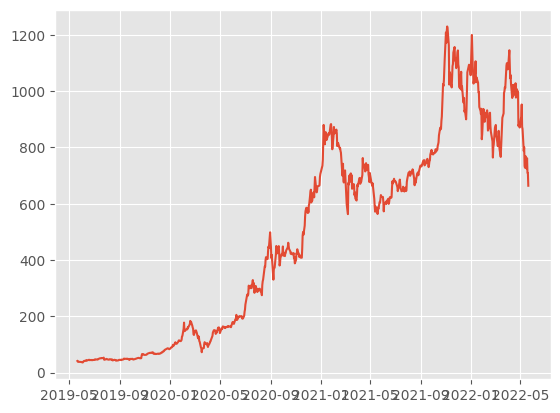

In [143]:
import numpy as numpy
import matplotlib.pyplot as plt
plt.plot(stock_Data.Close)

# this data is not in linear form.. can't classify it as linearly

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

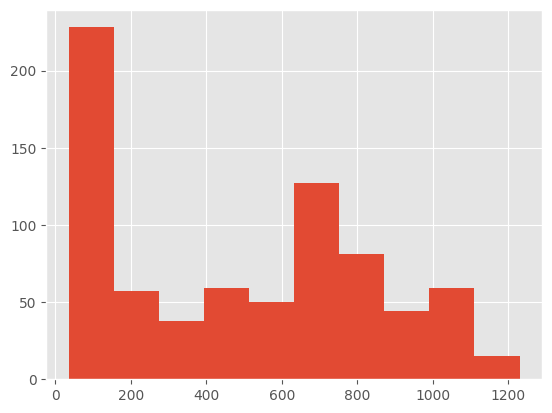

In [144]:
plt.hist(stock_Data.Close) # distribution of data

Text(0.5, 1.0, 'Tesla stock closing price')

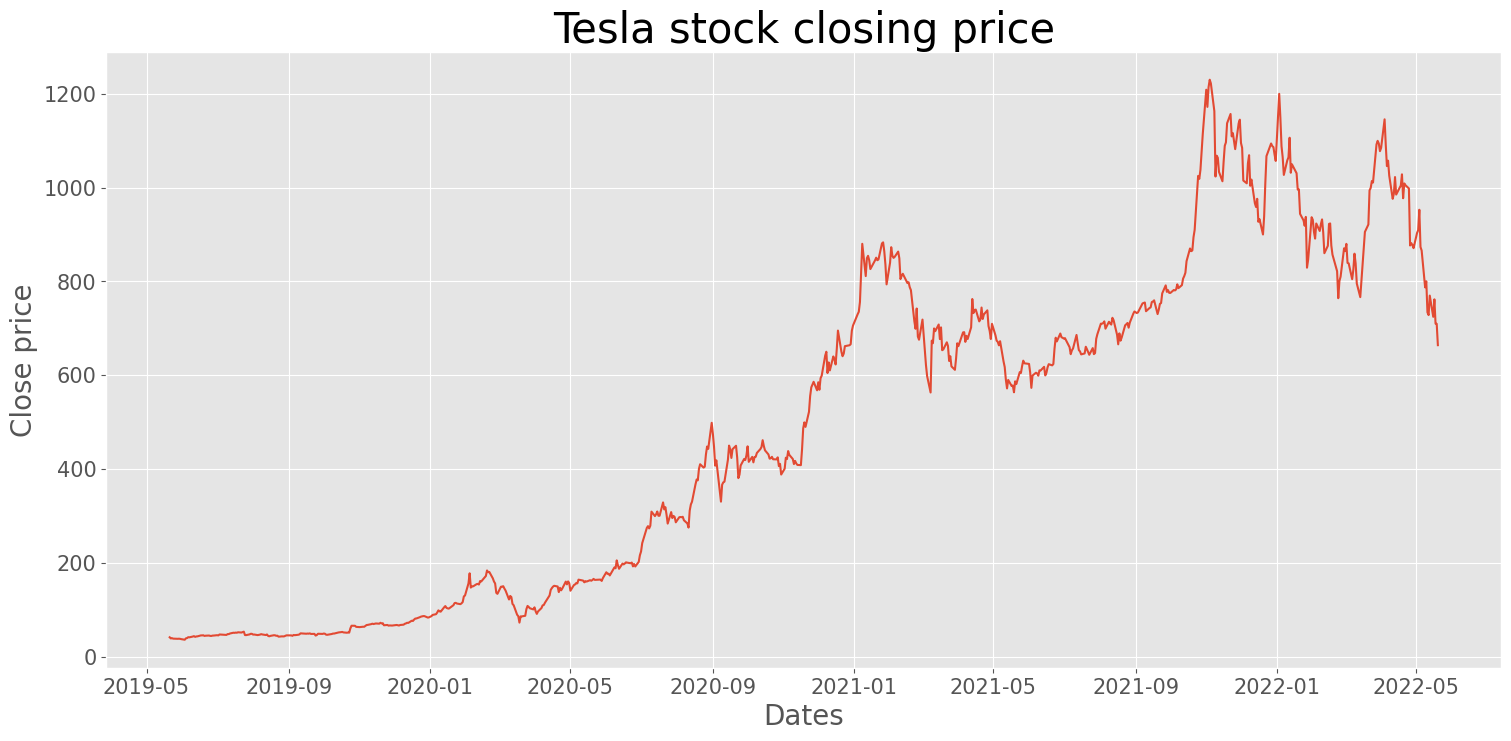

In [145]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.xticks(fontsize="15")
plt.ylabel("Close price", fontsize=20)
plt.yticks(fontsize="15")
plt.plot(stock_Data['Close'])
plt.title("Tesla stock closing price",fontsize=30)

Text(0.5, 1.0, 'Tesla stock closing price')

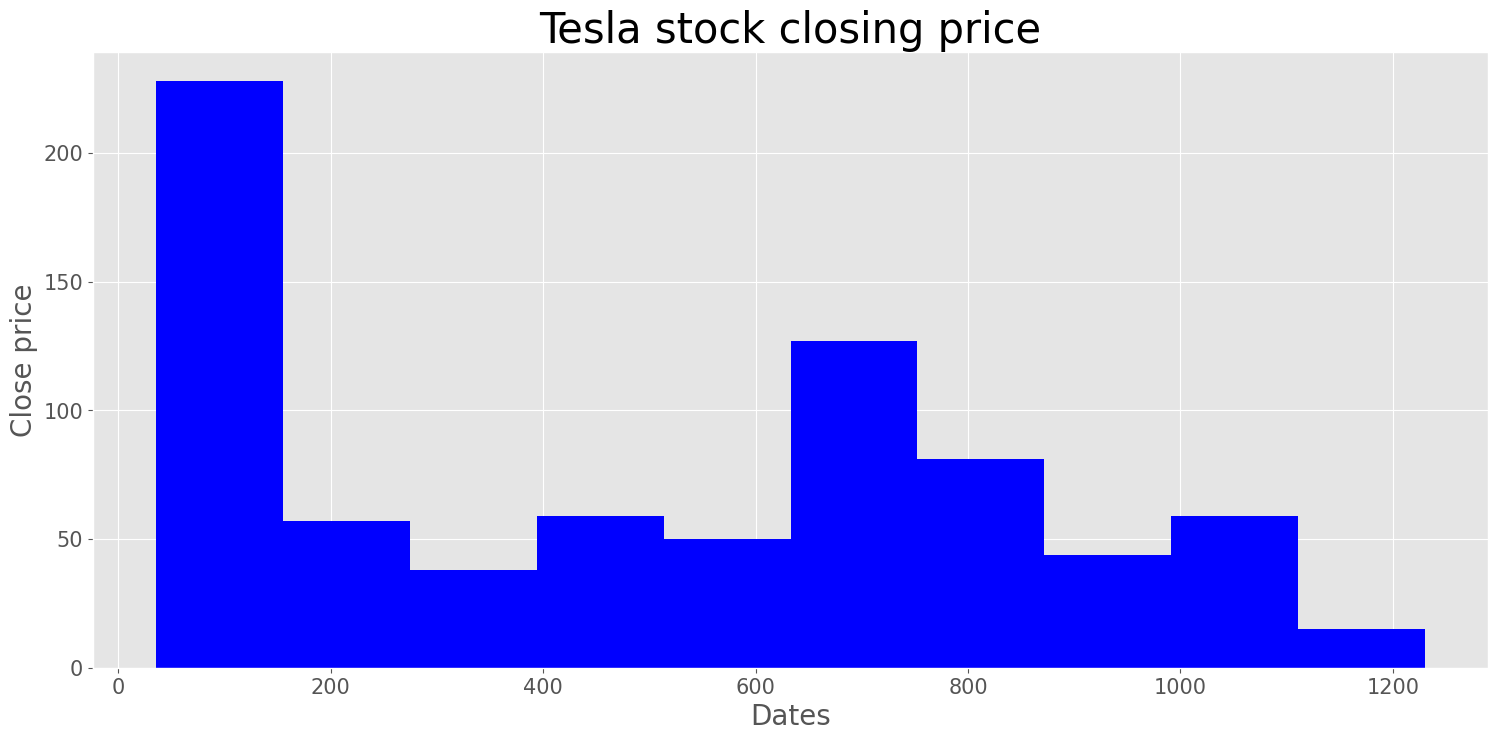

In [146]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.xticks(fontsize="15")
plt.ylabel("Close price", fontsize=20)
plt.yticks(fontsize="15")
plt.hist(stock_Data['Close'], color="blue")
plt.title("Tesla stock closing price",fontsize=30)

Text(0.5, 1.0, 'Tesla stock closing price')

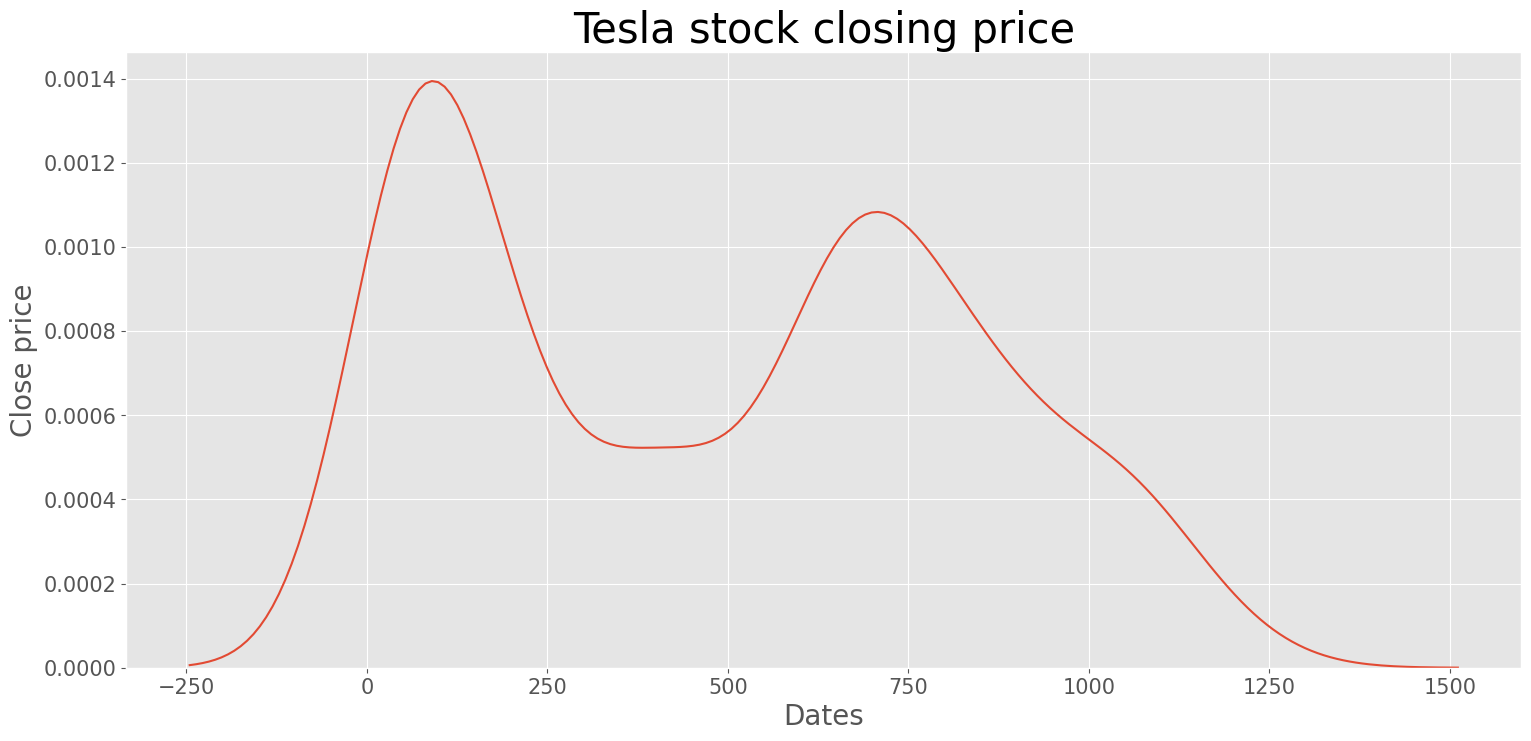

In [147]:
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.xticks(fontsize="15")
plt.ylabel("Close price", fontsize=20)
plt.yticks(fontsize="15")
sns.kdeplot(stock_Data['Close'])
plt.title("Tesla stock closing price",fontsize=30)

In [148]:
#creating window for records..
stock_Data["Close"].rolling(3).mean()


Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23     39.553333
2019-05-24     38.590000
2019-05-28     38.321334
                 ...    
2022-05-16    740.653341
2022-05-17    751.856669
2022-05-18    731.929993
2022-05-19    726.946655
2022-05-20    694.376668
Name: Close, Length: 758, dtype: float64

In [149]:
roll_mean = stock_Data["Close"].rolling(3).mean()

In [150]:
stock_Data["Close"].rolling(3).std()

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23     1.296425
2019-05-24     0.487492
2019-05-28     0.699754
                ...    
2022-05-16    25.125547
2022-05-17    24.136242
2022-05-18    26.714694
2022-05-19    30.019958
2022-05-20    26.394268
Name: Close, Length: 758, dtype: float64

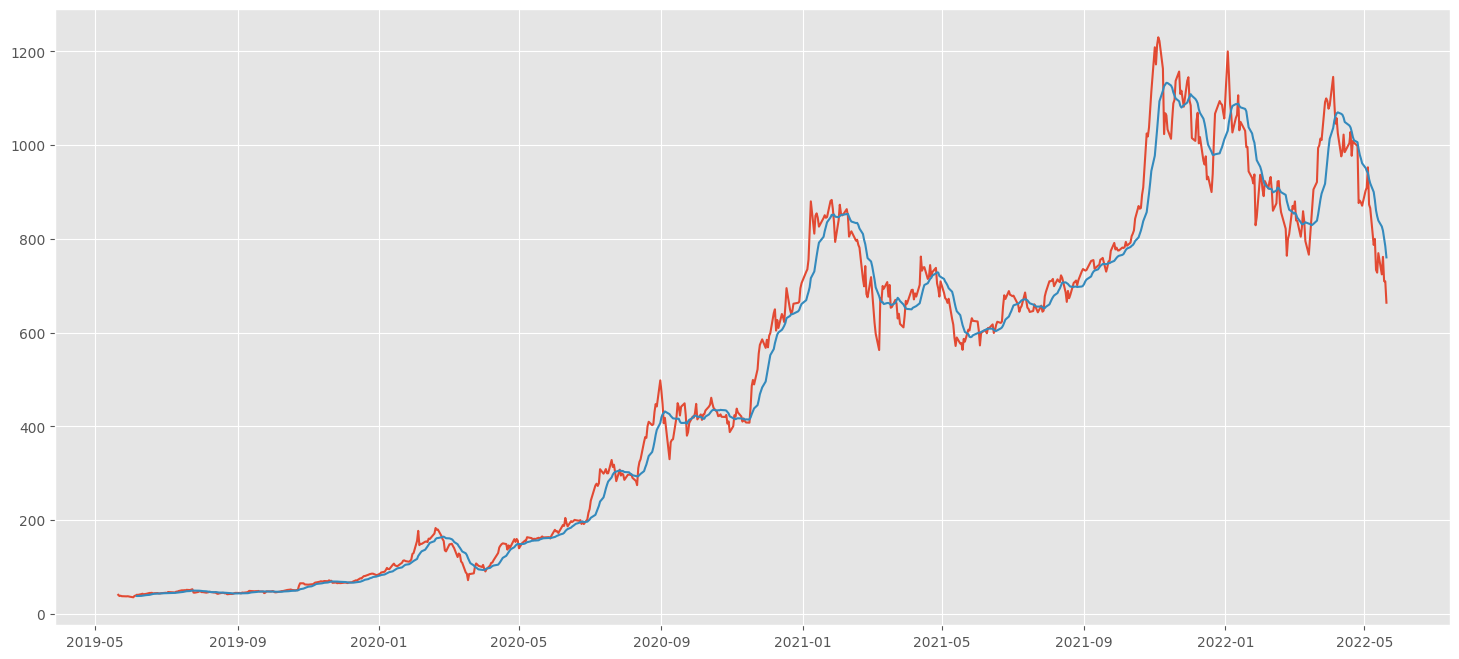

In [151]:
plt.figure(figsize=(18,8))
plt.plot(stock_Data.Close)
plt.plot(stock_Data["Close"].rolling(12).mean())
plt.show()

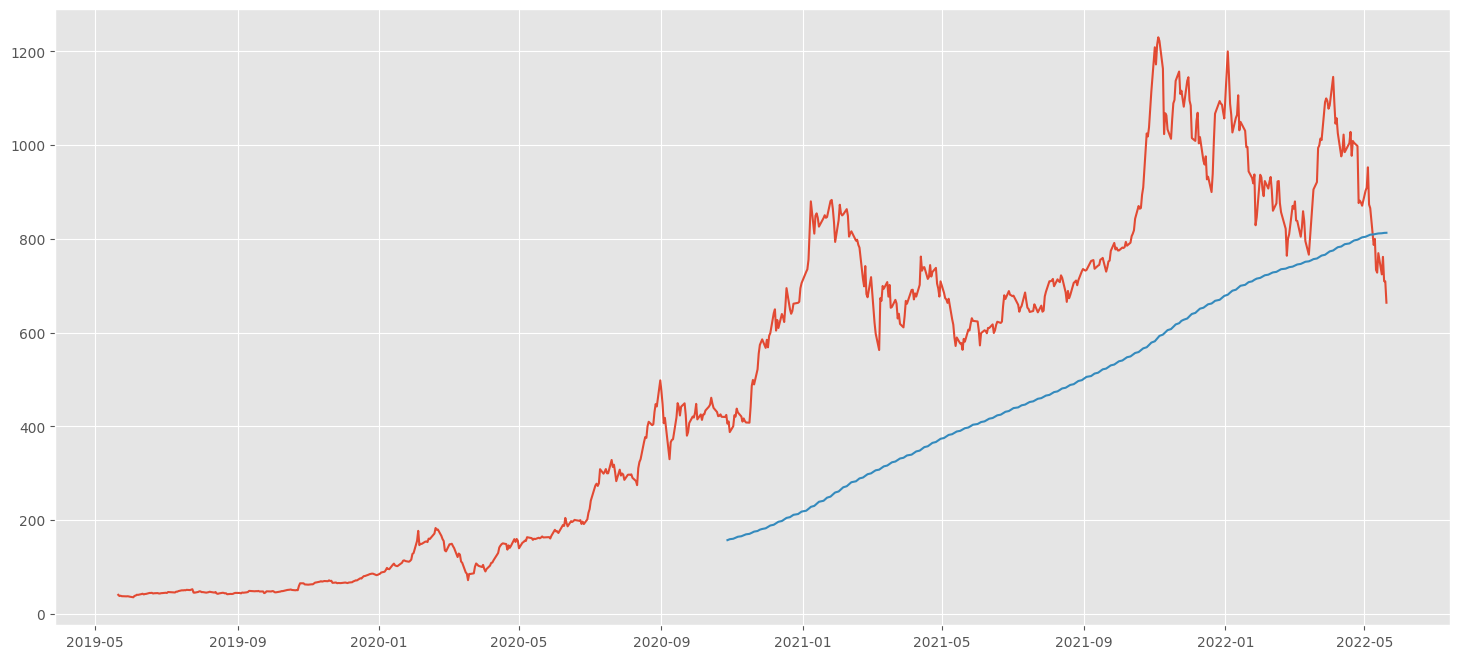

In [152]:
plt.figure(figsize=(18,8))
plt.plot(stock_Data.Close)
plt.plot(stock_Data["Close"].rolling(365).mean())
plt.show()

In [153]:
from statsmodels.tsa.stattools import adfuller 
# to identify the time series is stationary or not that is upword trend or down
adft = adfuller(stock_Data["Close"])

#Augmented Dickey–Fuller test


In [154]:
adft # { this data is 99,95 and 90 % confidence interval...}

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [155]:
#extracting data from adft... and name it
pd.Series(adft[0:4], index=["test stats","p-value",'lag',"data point"]) 

test stats     -1.363009
p-value         0.599876
lag             9.000000
data point    748.000000
dtype: float64

In [156]:
pd.Series()

Series([], dtype: float64)

check data is stationary or not??

2 techniques

1) visulization of data
2) stats based test
    ADF - augumented dockeyfullar
    p value - if pvalue is less than 0.05 i.e 5% reject null hypothesis that is "data is not stationary.."

non-staionary to stationary data
1) differencing
2) log data
3) square/root

In above example, p-value is 0.599 which is more than 5% so null hypothesis is accepted that is "data is stationary.."

In [157]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

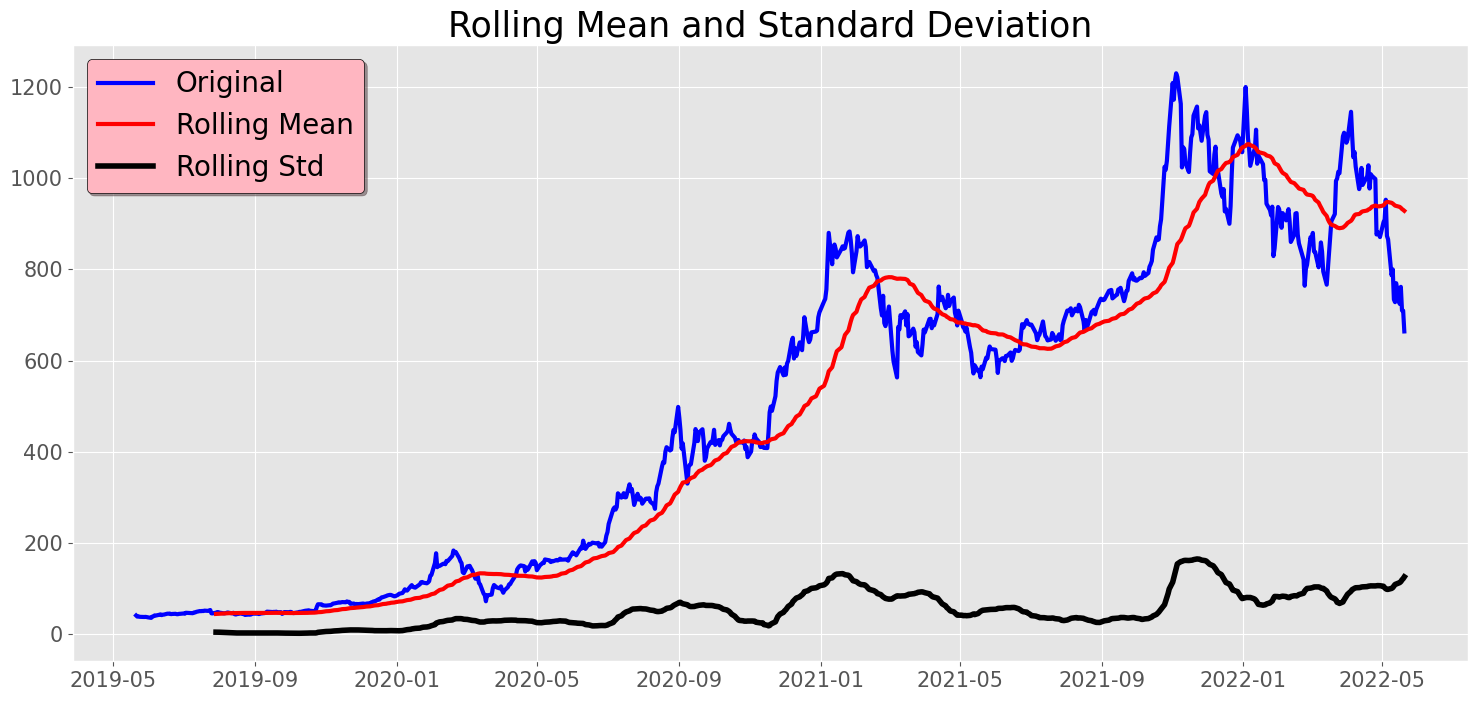

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [158]:
test_stationarity(stock_Data.Close)

In [159]:
# two type of timeseries
additive and multiplicative.......

SyntaxError: invalid syntax (990192855.py, line 2)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_Data['Close'], period=30)
# period ->how many days decompose ur time series

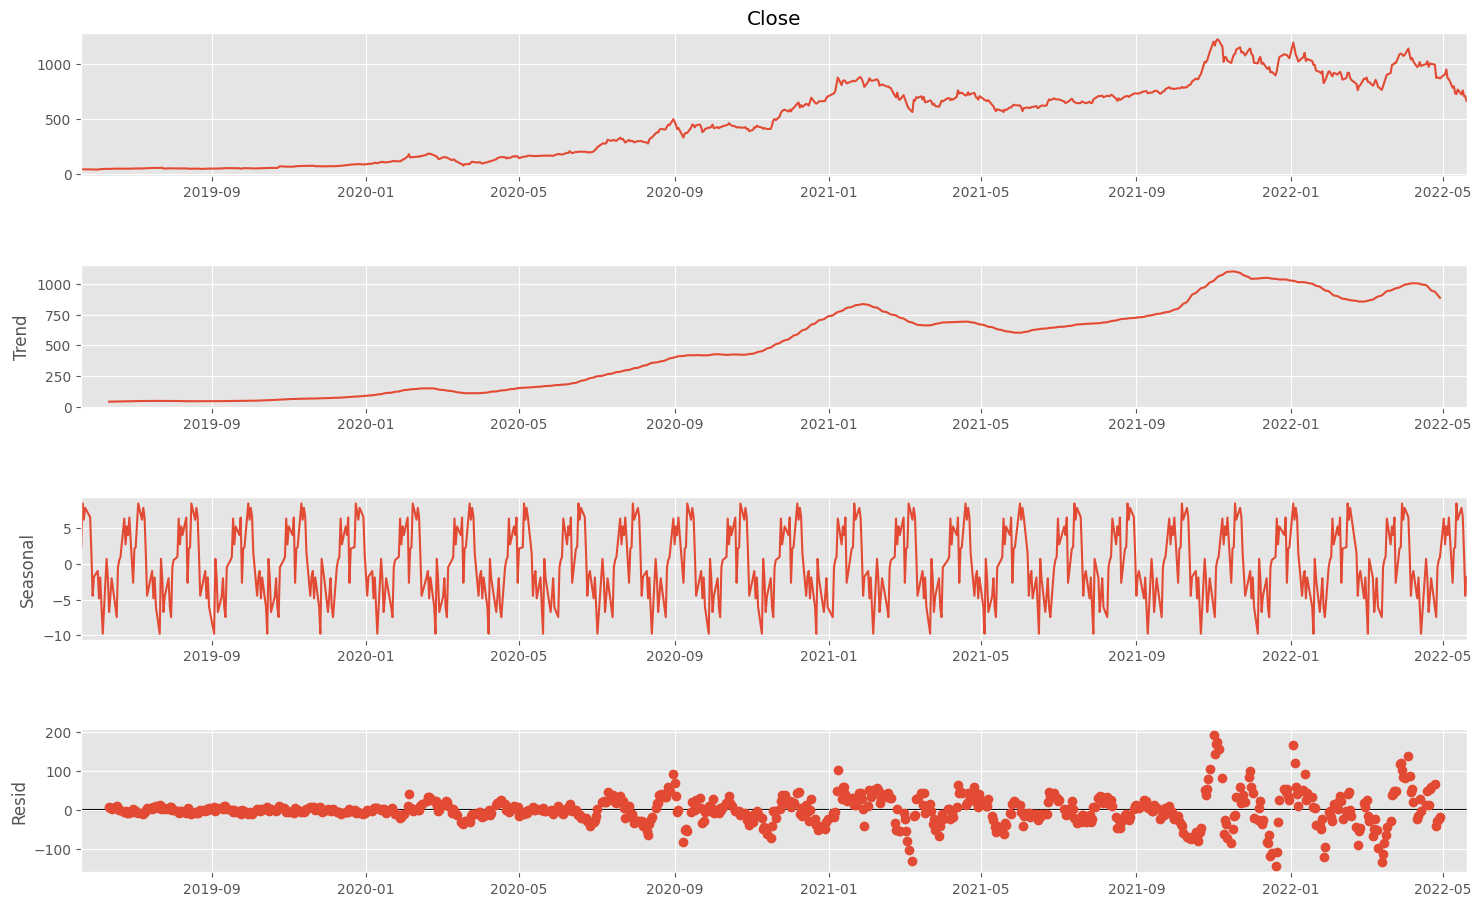

In [ ]:
plt.Figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

In [ ]:
result.seasonal

Date
2019-05-21    2.317701
2019-05-22    8.439826
2019-05-23    6.163890
2019-05-24    7.817719
2019-05-28    6.539408
                ...   
2022-05-16    7.817719
2022-05-17    6.539408
2022-05-18    1.508873
2022-05-19   -4.468046
2022-05-20   -1.826385
Name: seasonal, Length: 758, dtype: float64

In [ ]:
result.resid

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: resid, Length: 758, dtype: float64

In [ ]:
result.trend

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: trend, Length: 758, dtype: float64

In [ ]:
# detect outliers....

fig, ax = plt.subplot(figsize=(20,30))


AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_Data['Close'],model="multtiplicative" period=30)

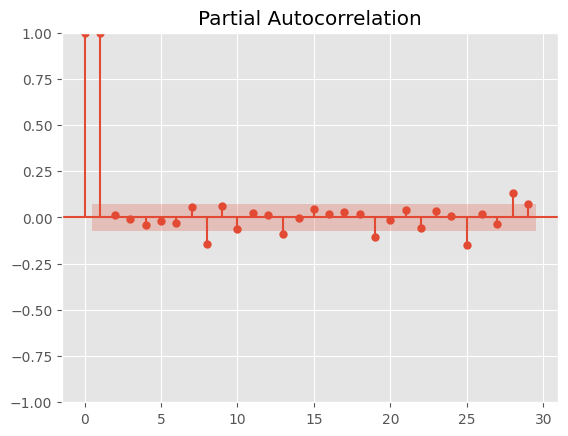

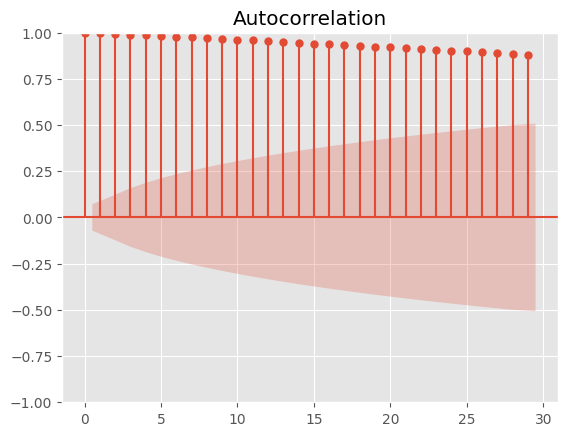

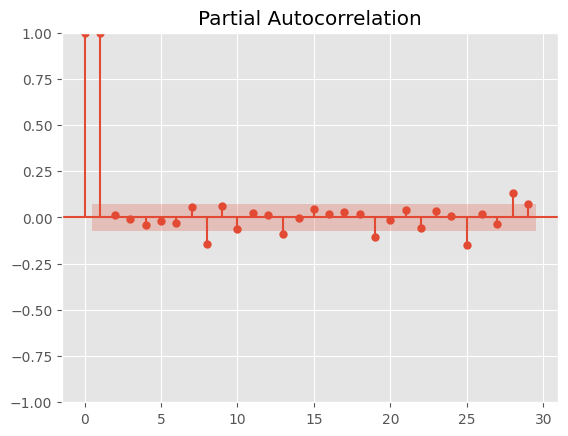

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_Data['Close']) # auto correlation..
plot_pacf(stock_Data['Close']) # partial corelation

## Preprocessing data...

1. fill the missing
2. covert data into stationary time series
3. if necessary then normalize the data
4. split the data into train and test
5. clean data by removing the outliers..

In [161]:
df_close = stock_Data['Close']

In [162]:
df_close.diff() # 1st diff

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [163]:
df_close.diff(2)

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

In [164]:
tsla_close_diff_1 =  df_close.diff() # 1st diff

In [165]:
tsla_close_diff_1.dropna(inplace=True)

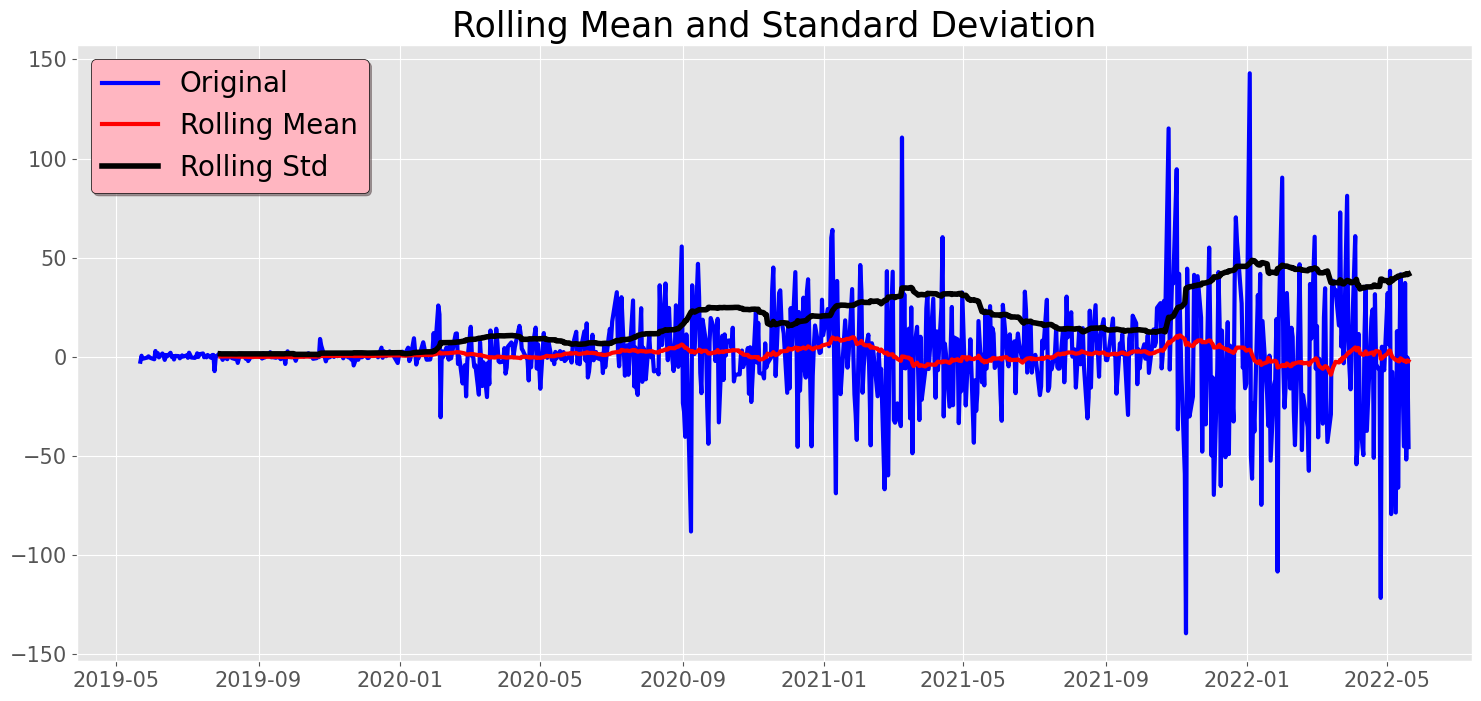

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [166]:
test_stationarity(tsla_close_diff_1)

In [167]:
train_data = df_close[0:-60]
test_data = df_close[-60:] # last 60 rows..


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

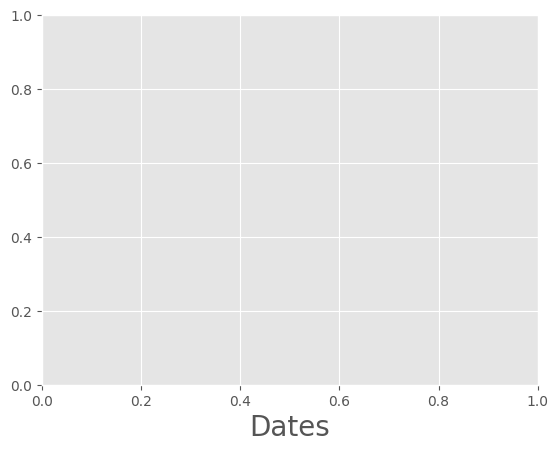

In [168]:
plt.Figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.ylable('Close', fontsize=20)


SARIMA -Seasonal Factor, 
        AR->P value, 
        I - differencing, 
        MA - q-moving average

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.SARIMAX import SARIMAX
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error


In [ ]:
history = [x for x in train_data]

In [ ]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [ ]:
model = ARIMA(history, order=(1,1,1)) 
# order of AR,I, MA - autoregression, integrated, moving average

In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Sat, 17 Jun 2023   AIC                           6306.700
Time:                        17:34:22   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
pred = model_fit.forecast()[0]

In [170]:
test_data[0]

809.8699951171875

In [171]:
mean_squared_error(test_data[0], pred)

TypeError: Singleton array 809.8699951171875 cannot be considered a valid collection.

In [ ]:
def train_arima_model():

In [ ]:
#evaluate models..

SARIMA

In [ ]:
import statsmodels.api as sm

history = [x for x in train_date]

predictions = list()
conf_list = list()

for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX